In [1]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
import pylab 
from sklearn import metrics
from scipy import stats
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD

In [2]:
tablin = pd.read_csv(r'C:\Users\Marta\Desktop\Rotación 2 SBD\BackUp_Proyecto\Python Scripts\Modelo evolución precios\Datos - copia - Marta\tabla_modelos.csv',
                   sep=';', engine="python", decimal=',', encoding="latin1")

In [3]:
tablin= tablin.drop(columns=['matricula','latitud','longitud','Actualizacion','Index',
'Provincia', 'PIB per cápita_log', 'Hipotecas','Transacciones inmobiliarias', 'Parque_viviendas_log', 'Euribor', 'Tasa de dudosidad_log','Tasa desempleo',
'Año','Year','parque_cat', 'tasa_cat','valor promedio m2 fomento','Valor metro cuadrado_log','linear_regression','ridge_regression','Codigo_Postal', 
'IMPTOTAL actualizado','Precio m2 actualizado','Precio m2', 'Valor metro cuadrado',
        'CONTAMINACION_TERRENO', 'CONTAMINACION_CONSTRUCCION', 'CONTAMINACION_OTROS', 'EDIF_LICENCIA_COD', 'EDIF_USO_POLIVALENTE',
       'CONTAMINACION_ACUSTICA','CONTAMINACION_AMBIENTAL','VIV_DISTR_NUM_ASCENSORES', 'VIV_INST_TERRAZA_TENDEDERO',
         'Transacciones_inmobiliarias_log','Tasa de dudosidad', 'VIV_INST_AGUA_CALIENTE', 'SUPADAPT', 'SUBTIPO_COD',
        'CONTAMINACION_TERRENO', 'CONTAMINACION_CONSTRUCCION', 'CONTAMINACION_OTROS', 'EDIF_VIV_REGI_LEGAL_DESC',
        'EDIF_LICENCIA_COD','EDIF_USO_POLIVALENTE','VIV_INST_COMU_TENIS_PADEL', 'UBICACION_INMUEBLE_COD_ENC',
                            'UBICACION_INMUEBLE_COD_DEB','Establecimientos_OSM','Parque viviendas', 'PIB per cápita', 'Euribor_log',
                            'CARAC_SINGULARES','VIV_INST_COMU_OTRAS_DEPORT', 'UBICACION_ZONA_COD_DEB'])
# a partir de la indentación, son variables que no aportaban nada al modelo y las debería quitar a posteriori
#es lo mismo usar los valores de linear_regression que todas las variables

In [ ]:
#Crear variables dummies 
hi= tablin.loc[:,['UBICACION_MUNICIPIO_DESC',
'UBICACION_ZONA_COD','UBICACION_INMUEBLE_COD','Municipio']]
dummy = pd.get_dummies(hi)
tablin = pd.concat([tablin, dummy], axis=1)
tablin = tablin.drop(['UBICACION_MUNICIPIO_DESC',
'UBICACION_ZONA_COD','UBICACION_INMUEBLE_COD','Municipio'], axis=1)

In [4]:
#Recodificar
tablin= tablin.replace('SI', '1')
tablin= tablin.replace('NO', '0')
tablin= tablin.replace('LIBRE', 'Libre' )
tablin= tablin.replace('ESPECIAL', 'Especial')

In [5]:
tablin= tablin.drop(columns=['Fecha','MATRICULA'])
tablin['VIV_SUPERF_TERRAZA']= [1 if x>0 else x for x in (tablin['VIV_SUPERF_TERRAZA'])] #codificar: tiene terraza o no

In [6]:
continuous_cols= ['SUPERF_ADOPTADA','Hipotecas_log','Tasa desempleo_log']

In [7]:
features = tablin[continuous_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
tablin[continuous_cols] = features

In [8]:
tablin=pd.DataFrame(tablin)

In [9]:
#split = 2     train,test = data[:split,:],data[split:,:]
train, test = train_test_split(tablin, test_size = 0.33, random_state = 0)

In [10]:
#  X, y = data[:, :-1], data[:, -1]   all rows and all columns up to the last; all rows and the last column
x_train = train.drop(columns=['IMPTOTAL'])
y_train = train.loc[:,'IMPTOTAL']
x_train = np.asarray(x_train)
y_train = np.asarray(y_train).reshape(len(y_train),1)
x_test = test.drop(columns=['IMPTOTAL'])
y_test = test.loc[:,'IMPTOTAL']
x_test = np.asarray(x_test)
y_test = np.asarray(y_test).reshape(len(y_test),1)
# some libraries require a one-dimensional array of output variables (y) be shaped as a two-dimensional array with one column 

In [11]:
train.shape

(28125, 282)

In [12]:
#do not change, 26 / 27 mae
# Set random seed
np.random.seed(0)
#callbacks = [EarlyStopping(monitor='val_loss',min_delta=0,patience=5, verbose=0, mode='auto')] #if the validation loss does not decrease throughout three batches, stop the network
model = Sequential()
model.add(Flatten())
model.add(Dense(30, input_dim=313, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam', metrics=['mse','mae'])
history = model.fit(x_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

#batch size=1 means it will only take one sample for each iteration, so we will need 21242 iterations in each of the 150 epochs
#therefore, if we decrease the batch size, we should decrease the number of epochs to improve time consumption
#find a balance
#e.g. if we set batch size to 500, we only need 2 iterations for each epoch : it will be very fast

Train on 22500 samples, validate on 5625 samples
Epoch 1/150
22500/22500 [==============================] - 1s 31us/sample - loss: 167535.5477 - mse: 42400583680.0000 - mae: 167535.6250 - val_loss: 158089.7107 - val_mse: 38411329536.0000 - val_mae: 158089.7188
Epoch 2/150
22500/22500 [==============================] - 0s 22us/sample - loss: 138752.9829 - mse: 33666990080.0000 - mae: 138752.9219 - val_loss: 104990.2169 - val_mse: 23782721536.0000 - val_mae: 104990.1953
Epoch 3/150
22500/22500 [==============================] - 0s 22us/sample - loss: 86814.8716 - mse: 19116982272.0000 - mae: 86814.8594 - val_loss: 75482.8874 - val_mse: 14781295616.0000 - val_mae: 75482.8984
Epoch 4/150
22500/22500 [==============================] - 0s 21us/sample - loss: 77176.9160 - mse: 15253495808.0000 - mae: 77176.9375 - val_loss: 74665.9884 - val_mse: 13949741056.0000 - val_mae: 74665.9688
Epoch 5/150
22500/22500 [==============================] - 0s 21us/sample - loss: 76807.8213 - mse: 14910543872

Epoch 80/150
22500/22500 [==============================] - 1s 23us/sample - loss: 39979.8324 - mse: 3985397504.0000 - mae: 39979.8242 - val_loss: 39067.9680 - val_mse: 3825130752.0000 - val_mae: 39067.9805
Epoch 81/150
22500/22500 [==============================] - 1s 23us/sample - loss: 39872.7166 - mse: 3972692992.0000 - mae: 39872.7227 - val_loss: 38952.9096 - val_mse: 3796532992.0000 - val_mae: 38952.9102
Epoch 82/150
22500/22500 [==============================] - 1s 23us/sample - loss: 39773.5402 - mse: 3956632832.0000 - mae: 39773.5469 - val_loss: 38838.7714 - val_mse: 3752886528.0000 - val_mae: 38838.7695
Epoch 83/150
22500/22500 [==============================] - 1s 23us/sample - loss: 39662.3341 - mse: 3944484096.0000 - mae: 39662.3086 - val_loss: 38740.0517 - val_mse: 3745512704.0000 - val_mae: 38740.0508
Epoch 84/150
22500/22500 [==============================] - 1s 23us/sample - loss: 39574.4874 - mse: 3929842176.0000 - mae: 39574.5039 - val_loss: 38664.8621 - val_mse: 377

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


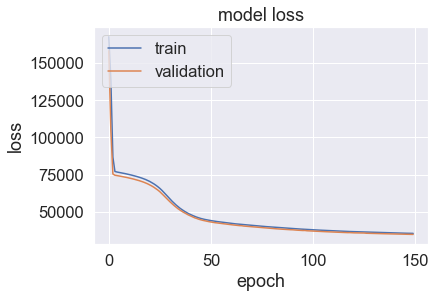

In [13]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

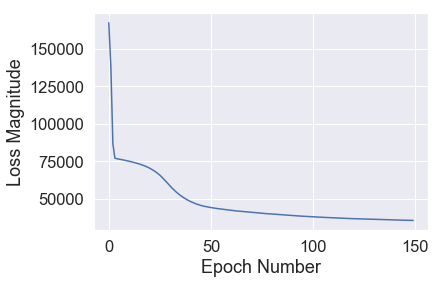

In [14]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [15]:
pred= model.predict(x_test)
list_predictions = [item for sublist in pred for item in sublist]
test['Predicciones'] = list_predictions

In [16]:
round(test.loc[:,['IMPTOTAL','Predicciones']].apply(lambda s: abs(s[0]-s[1])/s[0], axis=1).mean(),2)   #0.22 do not scale IMPTOTAL if you need the normal value

0.22

In [17]:
train_mse = model.evaluate(x_train, y_train)  #0.24    if you want a normal value you need to scale IMPTOTAL
test_mse = model.evaluate(x_test, y_test) #0.27

13853/13853 [==============================] - 0s 16us/sample - loss: 36906.4734 - mse: 3622256384.0000 - mae: 36906.4727


### Predict new values

In [18]:
pred= model.predict(x_test)
list_predictions = [item for sublist in pred for item in sublist]
test['Predicciones'] = list_predictions

### Individual predictions

In [19]:
#INDIVIDUAL PREDICTIONS
prediction = model.predict(x_test[:1])
prediction

array([[89531.984]], dtype=float32)

In [20]:
test[:5].loc[:,['IMPTOTAL', 'Predicciones']]

,IMPTOTAL,Predicciones
8398,169856.360,89531.984
23149,126501.090,146450.672
32939,103701.870,122722.742
22511,90214.580,85858.062
10204,69750.000,75927.875
